In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler



from fastprogress import progress_bar
import missingno as msno

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# # Set maximum number of rows to display
# pd.set_option('display.max_rows', 15)
# # Display all columns without truncation
# pd.set_option('display.max_columns', None)

# Data
- Age - 5-years gap
- Height (cm)
- Weight (kg)
- Waist (cm) - Waist circumference length
- Eyesight (left)
- Eyesight (right)
- Hearing (left)
- Hearing (right)
- Systolic - Blood pressure
- Relaxation - Blood pressure
- Fasting blood sugar
- Cholesterol - Total
- Triglyceride
- HDL - Cholesterol type
- LDL - Cholesterol type
- Hemoglobin
- Urine protein
- Serum creatinine
- AST - Glutamic oxaloacetic transaminase type
- ALT - Glutamic oxaloacetic transaminase type
- GTP - γ-GTP
- Dental caries
- Smoking

# 0. Preprocessing

In [2]:
import os

file_path = os.getcwd()  # Getting the current working directory
while not file_path.endswith("ml-group-80"):  # Checking if the file path ends with "ml-group-80"
    file_path = os.path.dirname(file_path)  # Going up one directory level
    if not file_path.endswith("ml-group-80"):  # Check if "0. data" should be appended
        file_path = os.path.join(file_path, "0. data")  # Appending "0. data" to the file path

In [3]:
file_path = file_path + "/00. final data"
file_path = "C:/Users/Justi/OneDrive/Bureaublad/ml-group-80/00. final data"
file_path

'C:/Users/Justi/OneDrive/Bureaublad/ml-group-80/00. final data'

In [4]:
train_file = '/train.csv'
test_file = '/test.csv'

train_file_path = file_path + train_file
test_file_path = file_path + test_file

In [41]:
df = pd.read_csv(train_file_path)
train = pd.read_csv(train_file_path)
test = pd.read_csv(train_file_path)

# 1. Data
## 1.1 Exploration


In [42]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [44]:
df.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,...,87,81,14.0,1,0.8,21,16,17,0,0


In [45]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [46]:
df.shape

(159256, 24)

### 1.1.1 Missing values

<Axes: >

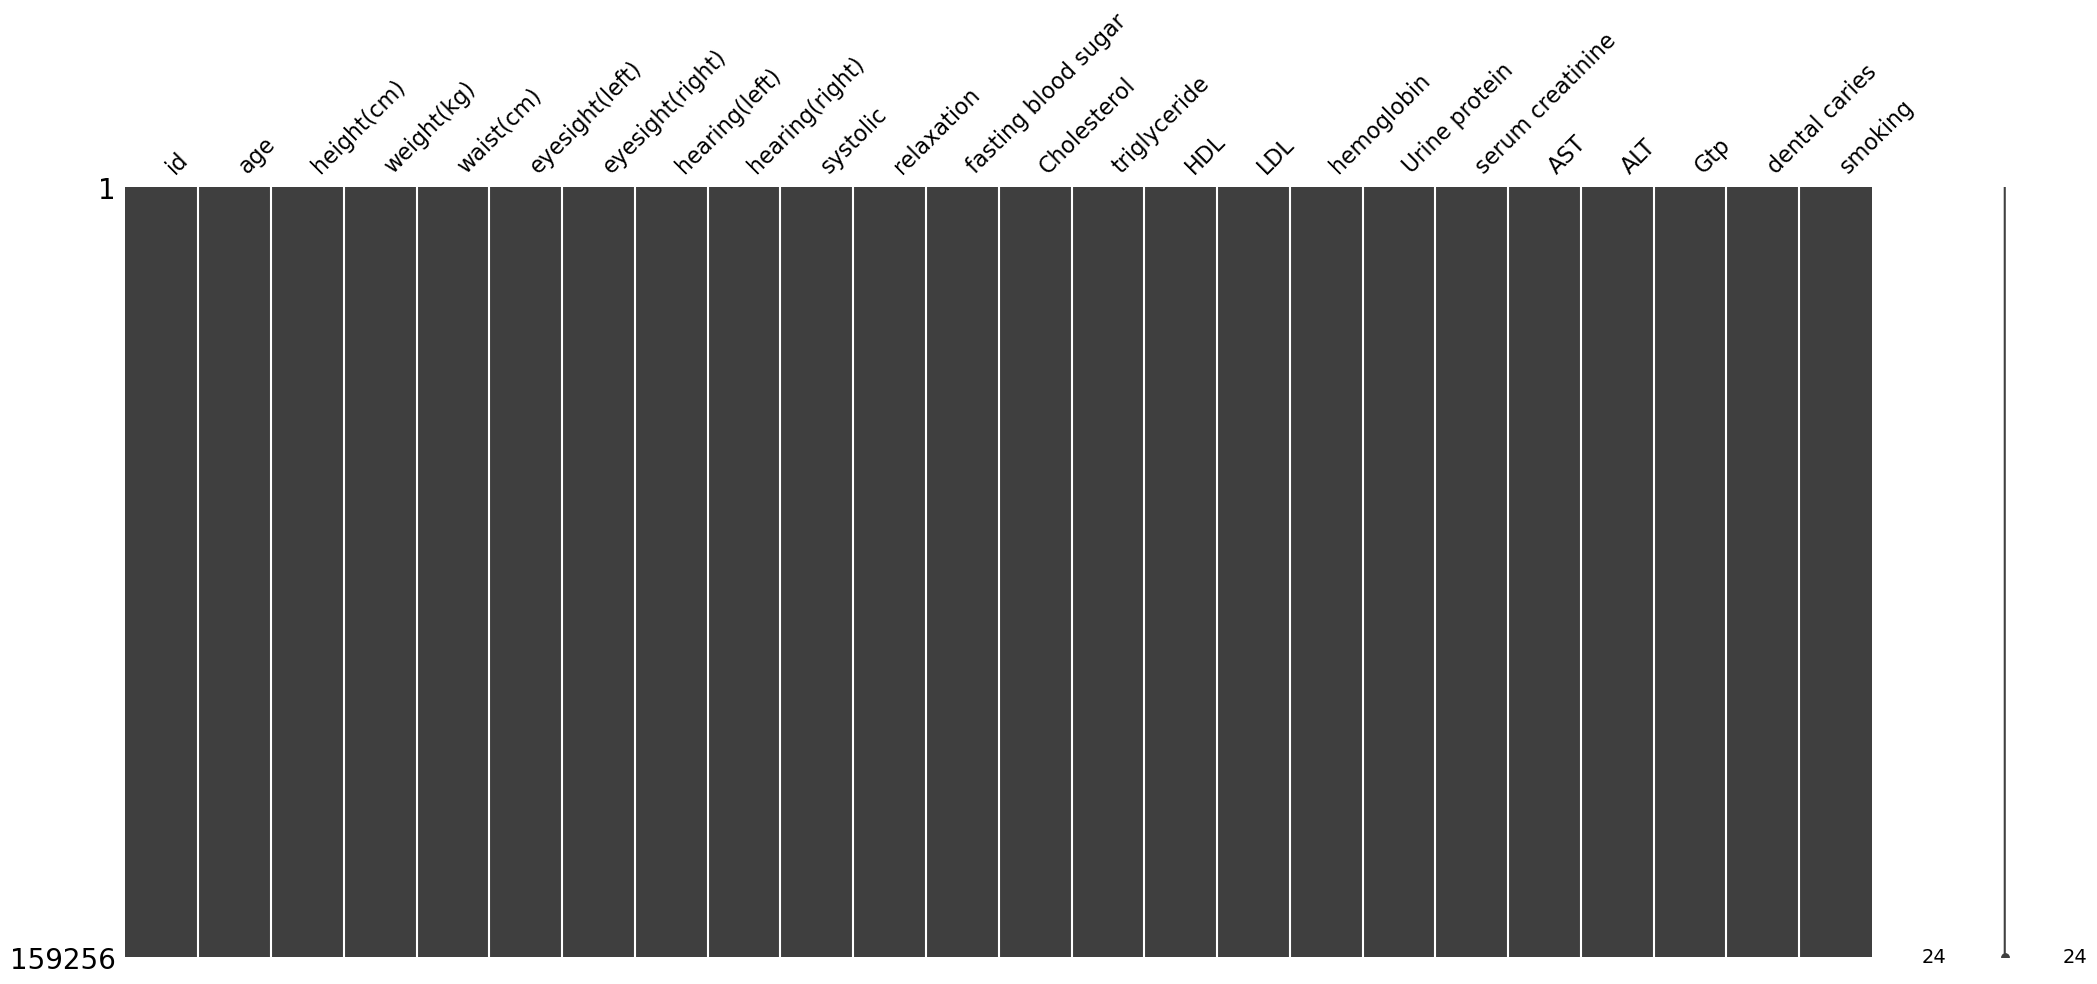

In [47]:
msno.matrix(df)

### 1.1.2 Duplicates

In [48]:
df.duplicated().sum()

0

### 1.1.3 Target

In [49]:
#>> Target
df.smoking.value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

### 1.1.4 Age

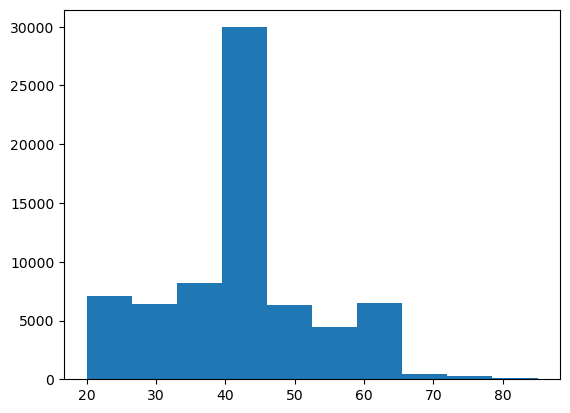

In [50]:
#Ploting Histogram to visualize people smoking based on their age group
plt.hist(df[df['smoking']==1][['age']])
plt.show()

In [51]:
df["age"].min()

20

In [52]:
df["age"].max()

85

## 1.2 Processing


In [53]:
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float32
 1   age                  159256 non-null  float32
 2   height(cm)           159256 non-null  float32
 3   weight(kg)           159256 non-null  float32
 4   waist(cm)            159256 non-null  float32
 5   eyesight(left)       159256 non-null  float32
 6   eyesight(right)      159256 non-null  float32
 7   hearing(left)        159256 non-null  float32
 8   hearing(right)       159256 non-null  float32
 9   systolic             159256 non-null  float32
 10  relaxation           159256 non-null  float32
 11  fasting blood sugar  159256 non-null  float32
 12  Cholesterol          159256 non-null  float32
 13  triglyceride         159256 non-null  float32
 14  HDL                  159256 non-null  float32
 15  LDL              

## 1.3 Adding features

### 1.3.1 BMI
bmi = weight / height (m) ^2

In [54]:
df["BMI"] = df["weight(kg)"] / ((df["height(cm)"]/100)**2)

In [55]:
df.BMI.min()

11.718749046325684

In [56]:
df.BMI.max()

45.785640716552734

### 1.3.2 Hypertension
Hypertention is defined as consistenyl elevated blood pressure levels, and systolic blood pressure is one of the key measurements used to diagnose and classify hypertension.
- Normal: sys < 120, relax < 80
- Elevated: sys 120 - 129, relax < 80
- Hypertention stage 1: sys 130 - 139, relax 80 - 89
- Hypertention stage 2: sys >= 140, relax > 90

In [57]:
df['systolic'].max()

213.0

In [58]:
def categorize_hypertension(df):
    if df['systolic'] >= 140 or df['relaxation'] >= 90:
        return 1
    else:
        return 0
    
df['hypertension'] = df.apply(categorize_hypertension, axis=1)


In [59]:
df['hypertension'].value_counts()

hypertension
0    141751
1     17505
Name: count, dtype: int64

## 1.4 Categorical variables
- Dental caries: 0, 1
- Urine protein: 1, 2, 3, 4, 5, 6
- Hearing left/right: 1, 2
- Hypertension: normal, elevated, stage 1, stage 2

In [60]:
def preprocess(df):
    df = pd.get_dummies(df, columns = ["hearing(left)","hearing(right)","Urine protein","dental caries", "hypertension"],dtype = 'int8')
    return df

In [62]:
df = preprocess(df)

KeyError: "None of [Index(['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries',\n       'hypertension'],\n      dtype='object')] are in the [columns]"

In [64]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0.0,dental caries_1.0,hypertension_0,hypertension_1
0,0.0,55.0,165.0,60.0,81.000000,0.5,0.6,135.0,87.0,94.0,...,1,0,0,0,0,0,1,0,1,0
1,1.0,70.0,165.0,65.0,89.000000,0.6,0.7,146.0,83.0,147.0,...,1,0,0,0,0,0,0,1,0,1
2,2.0,20.0,170.0,75.0,81.000000,0.4,0.5,118.0,75.0,79.0,...,1,0,0,0,0,0,1,0,1,0
3,3.0,35.0,180.0,95.0,105.000000,1.5,1.2,131.0,88.0,91.0,...,1,0,0,0,0,0,0,1,1,0
4,4.0,30.0,165.0,60.0,80.500000,1.5,1.0,121.0,76.0,91.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251.0,40.0,155.0,45.0,69.000000,1.5,2.0,127.0,80.0,64.0,...,1,0,0,0,0,0,1,0,1,0
159252,159252.0,50.0,155.0,75.0,82.000000,1.0,1.0,120.0,80.0,89.0,...,1,0,0,0,0,0,1,0,1,0
159253,159253.0,40.0,160.0,50.0,66.000000,1.5,1.0,114.0,70.0,84.0,...,1,0,0,0,0,0,1,0,1,0
159254,159254.0,50.0,165.0,75.0,92.000000,1.2,1.0,121.0,90.0,122.0,...,1,0,0,0,0,0,1,0,0,1


## 1.5 Feature selection

In [65]:
cor = df.corr()["smoking"].abs().sort_values(ascending=False)

cor.head(15)

smoking              1.000000
hemoglobin           0.450679
height(cm)           0.447111
weight(kg)           0.351748
triglyceride         0.331975
Gtp                  0.305561
serum creatinine     0.272979
HDL                  0.271186
waist(cm)            0.262715
age                  0.206033
ALT                  0.163016
BMI                  0.141723
eyesight(right)      0.109781
relaxation           0.109501
dental caries_0.0    0.106636
Name: smoking, dtype: float64

In [66]:
cor.tail(15)

systolic              0.058642
Cholesterol           0.051896
hearing(left)_2.0     0.038219
hearing(left)_1.0     0.038219
hearing(right)_1.0    0.036858
hearing(right)_2.0    0.036858
Urine protein_1.0     0.032247
Urine protein_2.0     0.026999
hypertension_0        0.023920
hypertension_1        0.023920
Urine protein_3.0     0.015999
Urine protein_6.0     0.005412
Urine protein_4.0     0.004314
Urine protein_5.0     0.003739
id                    0.000632
Name: smoking, dtype: float64

In [67]:
#top5 = cor.head(6)

selected_columns = ["smoking","hemoglobin", "height(cm)", "weight(kg)", "triglyceride", "Gtp", "hypertension_0", "hypertension_1"]

subset = df[selected_columns]
subset

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_0,hypertension_1
0,1.0,16.500000,165.0,60.0,300.0,27.0,1,0
1,0.0,16.200001,165.0,65.0,55.0,37.0,0,1
2,1.0,17.400000,170.0,75.0,197.0,53.0,1,0
3,0.0,15.900000,180.0,95.0,203.0,30.0,1,0
4,1.0,15.400000,165.0,60.0,87.0,17.0,1,0
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,1,0
159252,0.0,14.500000,155.0,75.0,202.0,18.0,1,0
159253,0.0,10.900000,160.0,50.0,45.0,12.0,1,0
159254,1.0,14.400000,165.0,75.0,148.0,37.0,0,1


In [68]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   smoking         159256 non-null  float32
 1   hemoglobin      159256 non-null  float32
 2   height(cm)      159256 non-null  float32
 3   weight(kg)      159256 non-null  float32
 4   triglyceride    159256 non-null  float32
 5   Gtp             159256 non-null  float32
 6   hypertension_0  159256 non-null  int8   
 7   hypertension_1  159256 non-null  int8   
dtypes: float32(6), int8(2)
memory usage: 3.9 MB


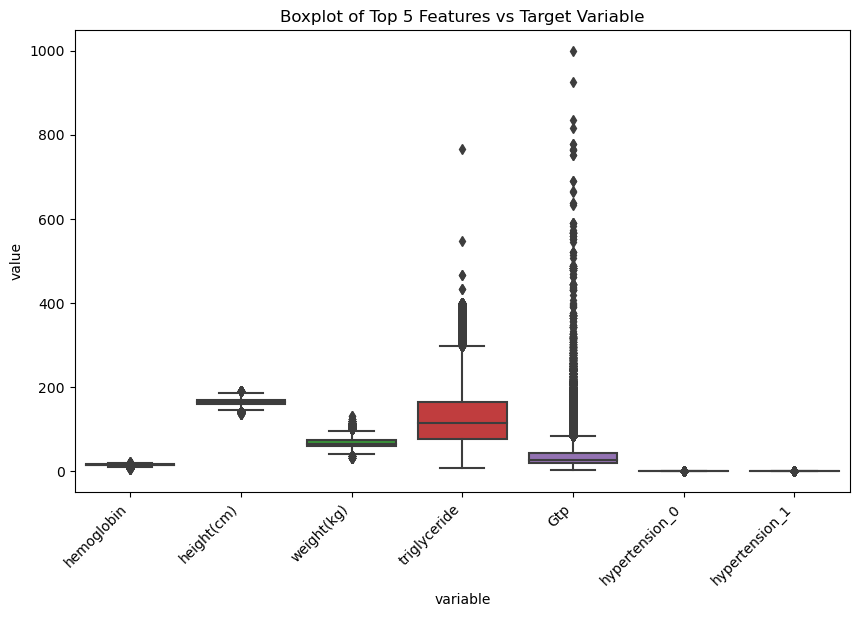

In [69]:
# Melt the DataFrame to long format for boxplot
subset_melted = pd.melt(subset, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_melted, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable')
plt.xticks(rotation=45, ha='right')
plt.show()

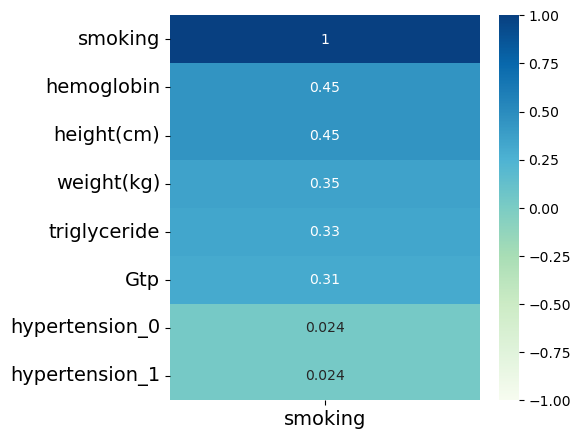

In [70]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(subset.corr()[['smoking']].abs().sort_values('smoking'),
            vmax=1, vmin=-1, annot=True, ax=ax, cmap="GnBu");

ax.invert_yaxis()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## 1.4 Outliers - PCA

In [71]:
subset

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_0,hypertension_1
0,1.0,16.500000,165.0,60.0,300.0,27.0,1,0
1,0.0,16.200001,165.0,65.0,55.0,37.0,0,1
2,1.0,17.400000,170.0,75.0,197.0,53.0,1,0
3,0.0,15.900000,180.0,95.0,203.0,30.0,1,0
4,1.0,15.400000,165.0,60.0,87.0,17.0,1,0
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,1,0
159252,0.0,14.500000,155.0,75.0,202.0,18.0,1,0
159253,0.0,10.900000,160.0,50.0,45.0,12.0,1,0
159254,1.0,14.400000,165.0,75.0,148.0,37.0,0,1


In [72]:
df_pca = subset.copy()

# pca only for numerical data
df_pca = df_pca.drop(["hypertension_0", "hypertension_1"], axis = 1)
df_pca.head()

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [74]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Select number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Project data onto selected components
X_projected = X_pca[:, :n_components]

# Calculate reconstruction error
X_reconstructed = np.dot(X_projected, pca.components_[:n_components]) + pca.mean_
reconstruction_error = np.sqrt(np.mean((X_scaled - X_reconstructed)**2, axis=1))

# Identify outliers
outlier_threshold = np.percentile(reconstruction_error, 95)
outliers = df_pca[reconstruction_error > outlier_threshold]

In [75]:
outliers

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
5,1.0,15.900000,170.0,55.0,343.0,119.0
35,0.0,13.100000,145.0,65.0,88.0,17.0
94,1.0,17.100000,170.0,110.0,194.0,28.0
95,1.0,17.100000,160.0,75.0,193.0,23.0
129,0.0,12.700000,155.0,75.0,60.0,24.0
...,...,...,...,...,...,...
159199,1.0,17.299999,160.0,75.0,121.0,33.0
159203,0.0,12.200000,140.0,55.0,76.0,12.0
159219,0.0,14.200000,150.0,70.0,102.0,16.0
159230,1.0,18.600000,175.0,100.0,180.0,96.0


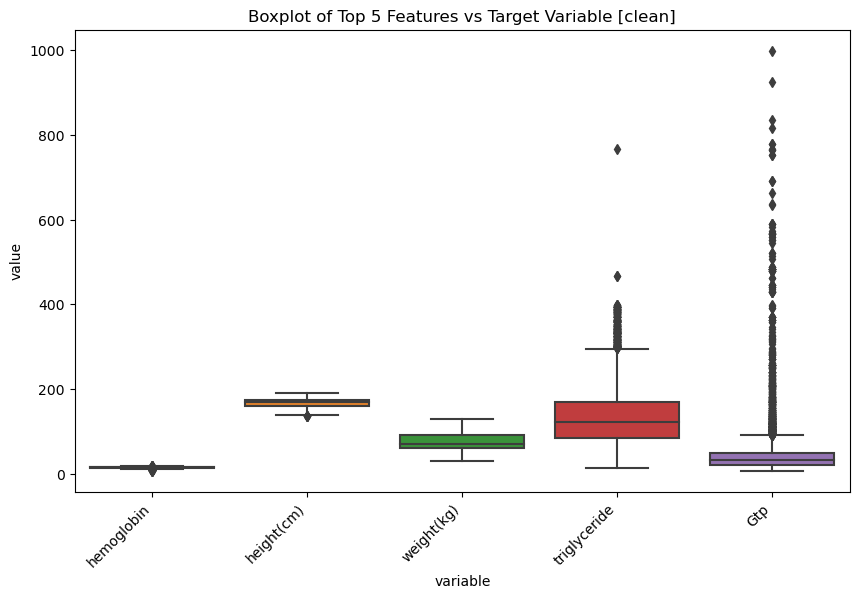

In [76]:
# Melt the DataFrame to long format for boxplot
clean_melt = pd.melt(outliers, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_melt, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable [clean]')
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
cleaned_data = df_pca.drop(outliers.index)

In [78]:
cleaned_data

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0
...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0
159252,0.0,14.500000,155.0,75.0,202.0,18.0
159253,0.0,10.900000,160.0,50.0,45.0,12.0
159254,1.0,14.400000,165.0,75.0,148.0,37.0


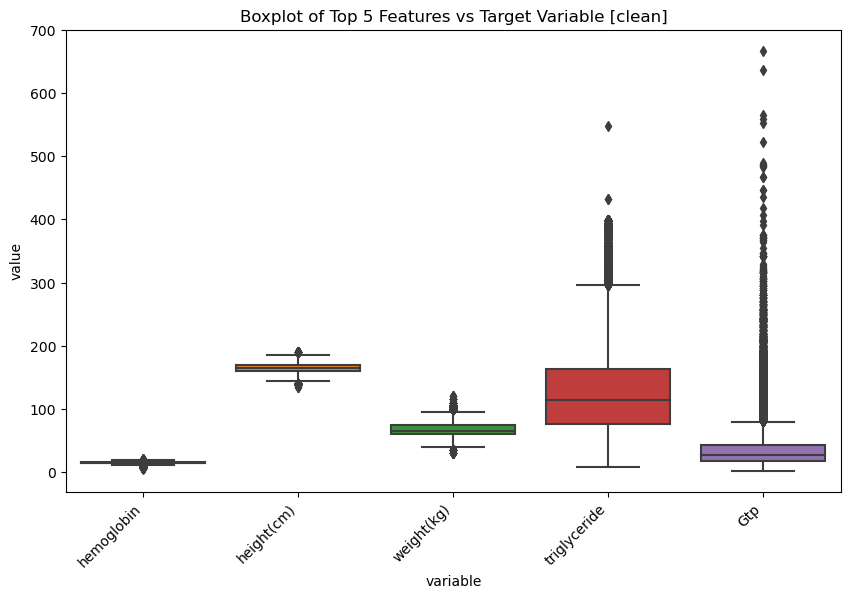

In [79]:
# Melt the DataFrame to long format for boxplot
clean_melt = pd.melt(cleaned_data, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_melt, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable [clean]')
plt.xticks(rotation=45, ha='right')
plt.show()

In [80]:
# hyp = subset[["hypertension_0", "hypertension_1"]]
hyp = subset[["hypertension_1", "hypertension_0"]]

hyp.head()

,hypertension_1,hypertension_0
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [81]:
cleaned_data.head()

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0


In [82]:
merged_df = pd.merge(cleaned_data, hyp, left_index=True, right_index=True)
merged_df

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_1,hypertension_0
0,1.0,16.500000,165.0,60.0,300.0,27.0,0,1
1,0.0,16.200001,165.0,65.0,55.0,37.0,1,0
2,1.0,17.400000,170.0,75.0,197.0,53.0,0,1
3,0.0,15.900000,180.0,95.0,203.0,30.0,0,1
4,1.0,15.400000,165.0,60.0,87.0,17.0,0,1
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,0,1
159252,0.0,14.500000,155.0,75.0,202.0,18.0,0,1
159253,0.0,10.900000,160.0,50.0,45.0,12.0,0,1
159254,1.0,14.400000,165.0,75.0,148.0,37.0,1,0


In [83]:
df_train = merged_df

<Axes: >

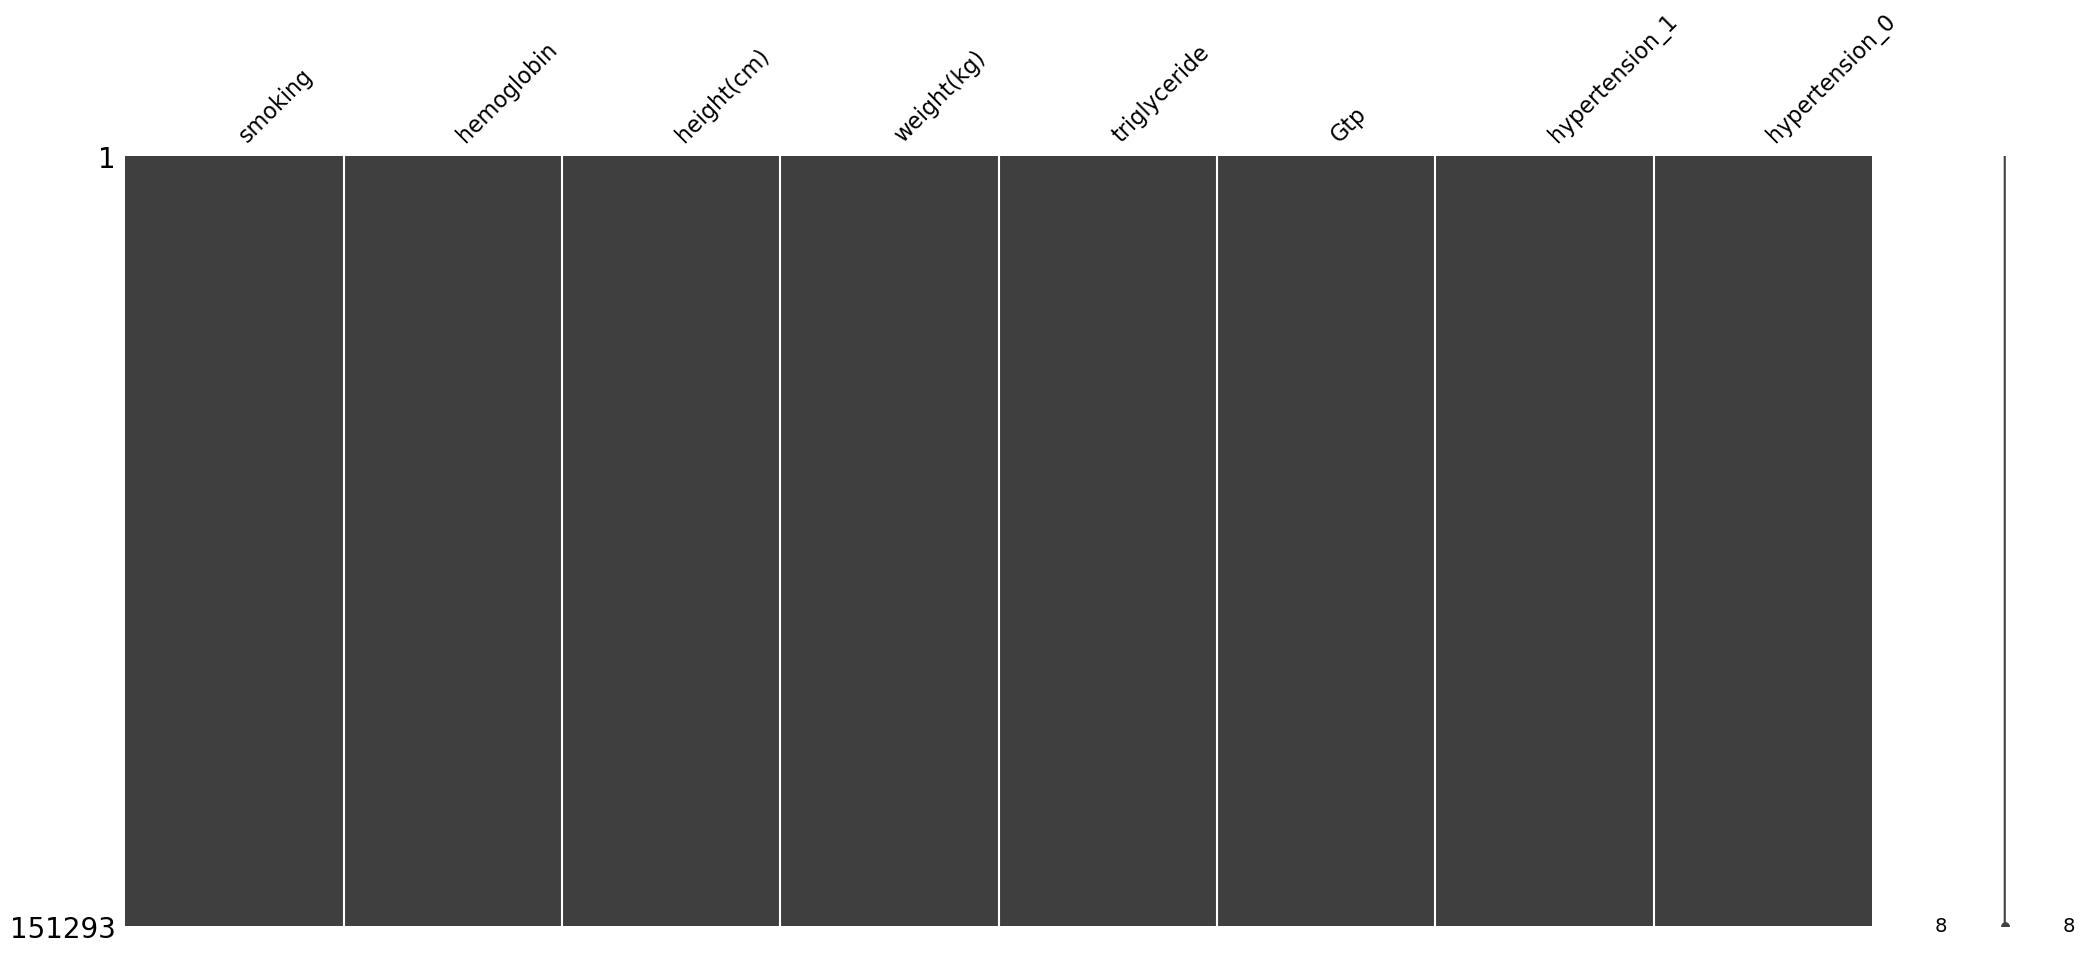

In [84]:
msno.matrix(df_train)

In [85]:
df_train = df_train.astype(np.float32)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151293 entries, 0 to 159255
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   smoking         151293 non-null  float32
 1   hemoglobin      151293 non-null  float32
 2   height(cm)      151293 non-null  float32
 3   weight(kg)      151293 non-null  float32
 4   triglyceride    151293 non-null  float32
 5   Gtp             151293 non-null  float32
 6   hypertension_1  151293 non-null  float32
 7   hypertension_0  151293 non-null  float32
dtypes: float32(8)
memory usage: 5.8 MB


# 2. Train/validation split

In [86]:
array_X = df_train.drop(columns='smoking').to_numpy()
array_y = df_train["smoking"].to_numpy()
# array_y = np.reshape(array_y, (-1, 1))

train_X, valid_X, train_y, valid_y = train_test_split(array_X, array_y, test_size=0.2)

In [107]:
model_norm = xgb.XGBClassifier()
# model = model.fit(train_X, train_y, eval_set = [(train_X, train_y), (valid_X, valid_y)])
model_norm.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
pred_norm = model_norm.predict(valid_X)


In [109]:
model_norm.score(valid_X, valid_y)

0.7721008625532899

In [111]:
roc_auc_score(pred_norm, valid_y)

0.7716348531983097

### Random Grid search


In [97]:
params = {
    'min_child_weight':[0, 1,3], 
    'gamma':[0, 1, 5],  
    'subsample':[0, 0.5, 1],
    'max_depth': [1,3,6],
    'lambda': [0, 1, 5],
    'eta': [0.1, 0.3, 0.5],
}

reg = xgb.XGBClassifier(nthread=-1)

n_iter_search = 100
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, verbose= 1
                                   )

model = random_search.fit(train_X, train_y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [98]:
model.best_params_

{'subsample': 1,
 'min_child_weight': 3,
 'max_depth': 6,
 'lambda': 5,
 'gamma': 0,
 'eta': 0.3}

In [104]:
model.score(valid_X, valid_y)

0.7735219273604548

In [102]:
pred = model.predict(valid_X)

In [90]:
cm = confusion_matrix(valid_y, pred)


([<matplotlib.axis.YTick at 0x1609f326690>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

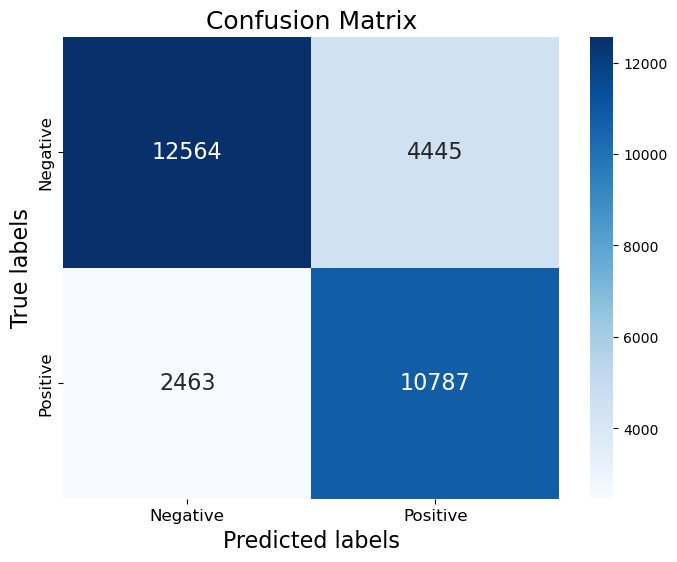

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Predicted labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'], fontsize=12)

In [92]:
print("F1 Score: ", f1_score(valid_y, pred))
print("Accuracy: ", model.score(valid_X, valid_y))


F1 Score:  0.7574608524682255
Accuracy:  -0.22829571367196536


In [106]:
roc_auc_score(pred, valid_y)

0.773167939904114

In [64]:
model.feature_importances_

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

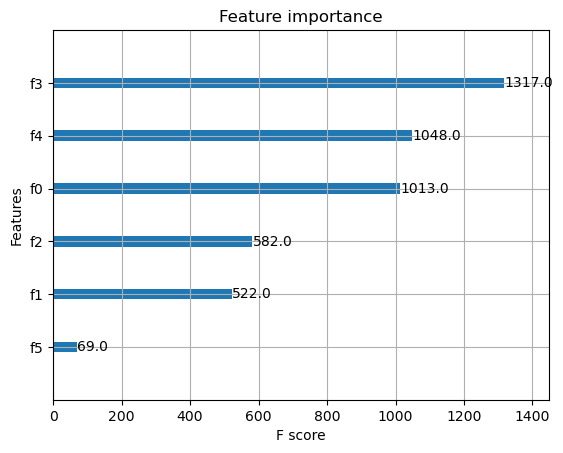

In [54]:
xgb.plot_importance(model)

In [55]:
df_train.columns

Index(['smoking', 'hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride',
       'Gtp', 'hypertension_1', 'hypertension_0'],
      dtype='object')

In [56]:
model.feature_importances_

array([0.11129289, 0.6465304 , 0.05407149, 0.05288332, 0.08297018,
       0.05225176, 0.        ], dtype=float32)

Feature Importance:
hemoglobin: 0.11129289120435715
height(cm): 0.6465303897857666
weight(kg): 0.054071489721536636
triglyceride: 0.052883315831422806
Gtp: 0.08297017961740494
hypertension_1: 0.05225175991654396
hypertension_0: 0.0


ValueError: input operand has more dimensions than allowed by the axis remapping

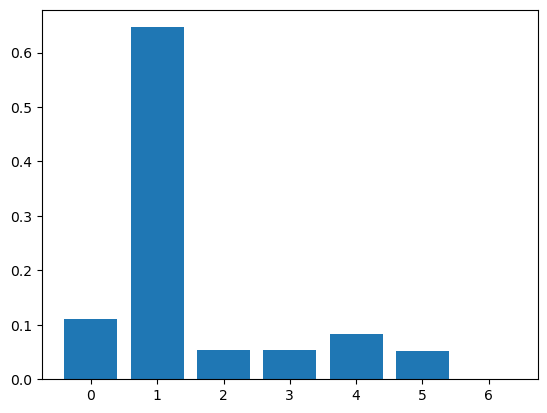

In [57]:
feature_importance = model.feature_importances_

# Map feature importance scores to feature names
feature_names = df_train.drop(columns='smoking')
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print feature importance scores
print("Feature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance, tick_label=feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()